In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/Users/saketmanolkar/Desktop/india/2022dataset1.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Assuming you want to fill empty fields with 'NA'
df.fillna('NA', inplace=True)



In [3]:
df

,Country Name,GDP,GDP_Growth,GDP_PerCap,Employment_to_population,Unemployment_total_%,Literacy_Rate,Population_growth,Access_to_electricity
0,Aruba,NA,NA,NA,NA,NA,NA,-0.086392,100.0
1,Africa Eastern and Southern,1170000000000.0,3.404852,1622.39172,64.456214,7.916835,72.600403,2.540937,48.103609
2,Afghanistan,NA,NA,NA,NA,NA,NA,2.534498,97.7
3,Africa Western and Central,878000000000.0,3.762758,1790.3488,58.90269,4.742175,60.312698,2.539799,54.224187
4,Angola,107000000000.0,3.045403,2998.501158,69.025,10.209,72.400002,3.096753,48.223854
...,...,...,...,...,...,...,...,...,...
261,Kosovo,9429156202.0,3.511707,5351.439542,NA,NA,NA,-1.355874,NA
262,"Yemen, Rep.",NA,NA,676.928385,33.127,13.59,NA,2.144628,74.877197
263,South Africa,406000000000.0,2.042299,6776.480077,39.874,29.806,NA,0.841058,89.3
264,Zambia,29784454056.0,4.744942,1487.907764,56.943,6.131,NA,2.758032,46.685116


# Pre Forecast Prediction


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataframe
# Assuming your dataframe is named df
# Note: Replace 'NA' with np.nan for proper handling of missing values
df.replace('NA', np.nan, inplace=True)

# Select relevant columns for clustering
columns_for_clustering = ['GDP', 'GDP_Growth', 'GDP_PerCap', 'Employment_to_population', 'Unemployment_total_%', 'Literacy_Rate', 'Population_growth', 'Access_to_electricity']

# Drop rows with missing values in the selected columns
df_cluster = df[columns_for_clustering].copy()

# Impute missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_cluster.loc[:, columns_for_clustering] = imputer.fit_transform(df_cluster)

# Calculate weights based on the mean absolute value of each column
weights = np.abs(df_cluster[columns_for_clustering].mean())

# Normalize weights to sum to 1
weights /= weights.sum()

# Display the calculated weights
print("Calculated Weights:")
print(weights.tolist())

Calculated Weights:
[0.9999999953976835, 1.1282568608522002e-12, 4.548633668905626e-09, 1.536561363592605e-11, 1.9813717901843847e-12, 7.722239780101051e-12, 2.90199191107154e-13, 2.719523116631053e-11]


Cluster 0:
Africa Eastern and Southern, Africa Western and Central, Albania, Angola, Arab World, Benin, Bhutan, Bosnia and Herzegovina, Botswana, Brazil, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Central African Republic, Central Europe and the Baltics, Chad, Chile, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Dominican Republic, Early-demographic dividend, Ecuador, Egypt, Arab Rep., Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Europe & Central Asia, Fragile and conflict affected situations, Gabon, Gambia, The, Georgia, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Heavily indebted poor countries (HIPC), IBRD only, IDA & IBRD total, IDA blend, IDA only, IDA total, India, Iran, Islamic Rep., Kenya, Korea, Dem. People's Rep., Lao PDR, Late-demographic dividend, Latin America & Caribbean, Latin America & Caribbean (excluding high income), Latin America & the Caribbean (IDA & IBRD countries), Least developed countries: UN classification, Lesotho, Libe

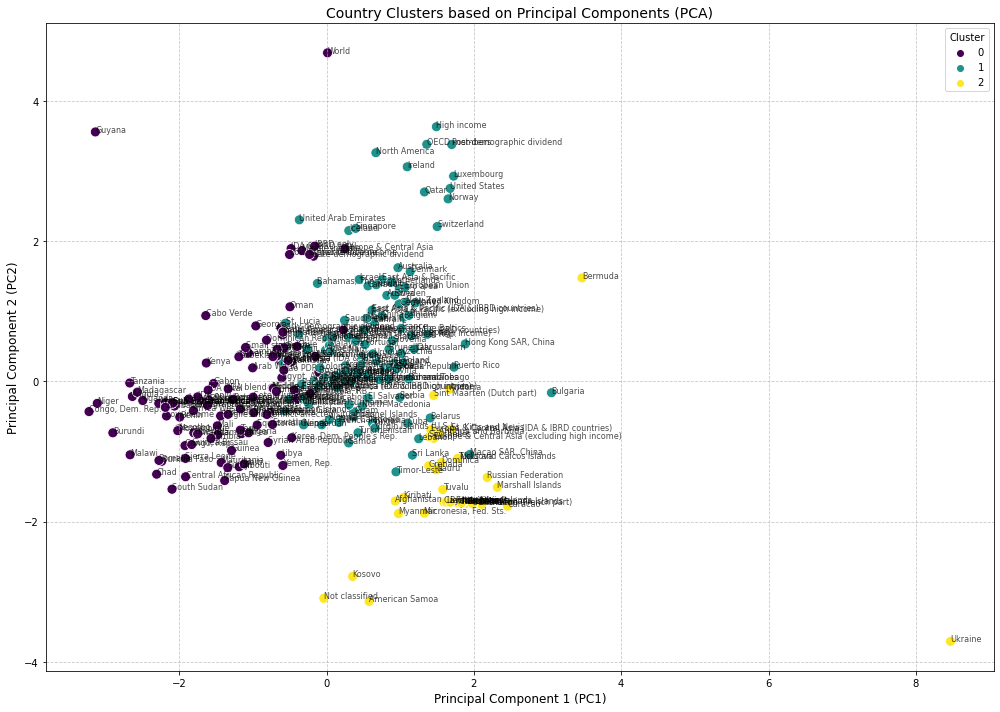

Mean Silhouette Score (KMeans): 0.3376733361032853


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def cluster_countries_kmeans(df, columns_for_clustering, weights, n_clusters=3):
    # Drop rows with missing values in the selected columns
    df_cluster = df[columns_for_clustering].copy()

    # Impute missing values with 0
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    df_cluster.loc[:, columns_for_clustering] = imputer.fit_transform(df_cluster)

    # Apply weights manually to each column
    for col, weight in zip(columns_for_clustering, weights):
        df_cluster[col] *= weight

    # Standardize the features
    scaler = StandardScaler(with_mean=True, with_std=True)
    df_cluster_scaled = scaler.fit_transform(df_cluster)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    df_cluster_pca = pd.DataFrame(pca.fit_transform(df_cluster_scaled), columns=['PC1', 'PC2'])

    # Apply KMeans Clustering with 'k-means++' initialization
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    df_cluster_pca['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

    return df_cluster_pca

def plot_country_clusters(df, df_cluster_pca, cluster_names):
    # Set a larger plot size
    plt.figure(figsize=(14, 10))

    # Scatter plot with different colors for each cluster
    scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_cluster_pca, palette='viridis', edgecolor='w', s=100)

    # Sort country names alphabetically within each cluster
    df_sorted = df.sort_values(by='Country Name')
    for i, country in enumerate(df_sorted['Country Name']):
        idx = df_sorted.index[df_sorted['Country Name'] == country].tolist()[0]
        plt.annotate(country, (df_cluster_pca['PC1'].iloc[idx], df_cluster_pca['PC2'].iloc[idx]), fontsize=8, alpha=0.7)

    # Set plot labels and title
    plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
    plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
    plt.title('Country Clusters based on Principal Components (PCA)', fontsize=14)

    # Add legend
    plt.legend(title='Cluster', fontsize=10)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

def print_clustered_countries(df_cluster_pca, df):
    # Merge the original dataframe with the cluster information
    df_merged = pd.merge(df, df_cluster_pca[['Cluster']], left_index=True, right_index=True)

    # Sort the dataframe by cluster and then alphabetically by country name
    df_merged = df_merged.sort_values(by=['Cluster', 'Country Name'])

    # Create a paragraph to print the clusters and arrange country names alphabetically
    paragraph = ""
    for cluster_num in df_merged['Cluster'].unique():
        paragraph += f"Cluster {cluster_num}:\n"
        for country in df_merged[df_merged['Cluster'] == cluster_num]['Country Name']:
            paragraph += f"{country}, "
        paragraph = paragraph.rstrip(", ") + "\n\n"

    print(paragraph)

# Load the dataframe
# Assuming your dataframe is named df
# Note: Replace 'NA' with np.nan for proper handling of missing values
df.replace('NA', np.nan, inplace=True)

# New column names
columns_for_clustering = ['GDP', 'GDP_Growth', 'GDP_PerCap', 'Employment_to_population', 'Unemployment_total_%', 'Literacy_Rate', 'Population_growth', 'Access_to_electricity']
weights = [0.2, 0.1, 0.2, 0.1, 0.1, 0.2, 0.05, 0.05]
# Define cluster names
cluster_names = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Cluster the countries using KMeans with 'k-means++' initialization
df_cluster_pca_kmeans = cluster_countries_kmeans(df, columns_for_clustering, weights)

# Print the clusters and arrange country names alphabetically
print_clustered_countries(df_cluster_pca_kmeans, df)

# Plot the country clusters for KMeans
plot_country_clusters(df, df_cluster_pca_kmeans, cluster_names)

# Print silhouette score for KMeans
silhouette_avg_kmeans = silhouette_score(df_cluster_pca_kmeans[['PC1', 'PC2']], df_cluster_pca_kmeans['Cluster'])
print(f'Mean Silhouette Score (KMeans): {silhouette_avg_kmeans}')


NOTE **

Title: Enhancing the Real-World Relevance of Clustering Analysis

As we delve into the clustering analysis results, it's imperative to recognize the nuances and limitations of our current approach. The clusters defined as "Second World," "First World," and "Third World" are constructed based on a selection of parameters including 'GDP,' 'GDP Growth,' 'GDP Per Capita,' 'Employment to Population Ratio,' 'Unemployment Rate,' 'Literacy Rate,' 'Population Growth,' and 'Access to Electricity.' While these indicators offer valuable insights, it's crucial to acknowledge that this classification might not comprehensively represent the real-world situation.

Limited Parameter Consideration:
The primary limitation lies in the relatively narrow scope of parameters considered for clustering. To present a more holistic view of a country's development, we should expand our parameter set to include:

a) Health Indicators: Life expectancy, healthcare access, disease prevalence.

b) Education Metrics: Educational attainment, quality of education, research and development.

c) Environmental Factors: Sustainability practices, carbon emissions, natural resource management.

d) Social Well-being: Income inequality, social infrastructure, gender equality.

However, due to time constraints, these were not included in the current analysis.

Holistic View of Development:
Development is a multifaceted concept encompassing economic, social, and environmental dimensions. While Cluster 1 is designated as "First World," this classification is anchored in the selected parameters. In reality, the true essence of "First World" involves socio-economic, political, and cultural considerations that extend beyond our current clustering criteria.

Consideration of Cluster 1:
A notable point to emphasize is that, while all countries traditionally deemed as "First World" find themselves in Cluster 1, not every country in Cluster 1 aligns precisely with this classification. The clustering is predominantly driven by specific indicators, necessitating a more nuanced examination to accurately portray each country's unique development profile.

Future Analysis Recommendations:
Recognizing the constraints of time and computational resources, it's acknowledged that the inclusion of more parameters might be challenging. However, for future analyses seeking a more realistic representation:

a) Incorporate a Diverse Set of Indicators: Including parameters from various aspects of development.

b) Utilize Advanced Analytical Techniques: Explore advanced methods to capture intricate relationships between parameters.

c) Consider Dynamic Factors: Account for dynamic elements influencing development trends over time.

Conclusion:
In conclusion, while our current clustering provides valuable insights, the results are contingent on the selected parameters. By expanding our parameter set in future analyses, we can refine our clustering approach to mirror the complexities of the real-world development landscape more accurately. The consideration of a broader spectrum of factors will undoubtedly contribute to a more nuanced and realistic classification of countries.

# Post Forecast Prediction

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


# New data provided by the user
new_data = {
    'GDP': [8.17988821e+12],
    'GDP_Growth': [7.00295154],
    'GDP_PerCap': [4693.283298],
    'Employment_to_population': [48.33100929],
    'Unemployment_total_%': [7.8330262],
    'Literacy_Rate': [94.88419693662945],
    'Population_growth': [0.2555841533350882],
    'Access_to_electricity': [100]
}

# Create a new DataFrame for the new data
new_data_df = pd.DataFrame(new_data)

# Define the columns for clustering and their respective weights
columns_for_clustering = [
    'GDP', 'GDP_Growth', 'GDP_PerCap', 'Employment_to_population', 
    'Unemployment_total_%', 'Literacy_Rate', 'Population_growth', 'Access_to_electricity'
]
    weights = [0.2, 0.1, 0.2, 0.1, 0.1, 0.2, 0.05, 0.05]

# Impute missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_cluster = imputer.fit_transform(df[columns_for_clustering])

# Apply weights manually to each column
df_cluster_weighted = pd.DataFrame(df_cluster, columns=columns_for_clustering) * weights

# Standardize the features
scaler = StandardScaler(with_mean=True, with_std=True)
df_cluster_scaled = scaler.fit_transform(df_cluster_weighted)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_cluster_pca = pd.DataFrame(pca.fit_transform(df_cluster_scaled), columns=['PC1', 'PC2'])

# Apply KMeans Clustering with 'k-means++' initialization
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_cluster_pca['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Prepare the new data point in the same way as the original data
new_data_scaled = scaler.transform(new_data_df[columns_for_clustering] * weights)
new_data_pca = pca.transform(new_data_scaled)

# Predict the cluster for the new data point
new_data_cluster = kmeans.predict(new_data_scaled)
print(f"The new record belongs to Cluster {new_data_cluster[0]}.")


The new record belongs to Cluster 0.


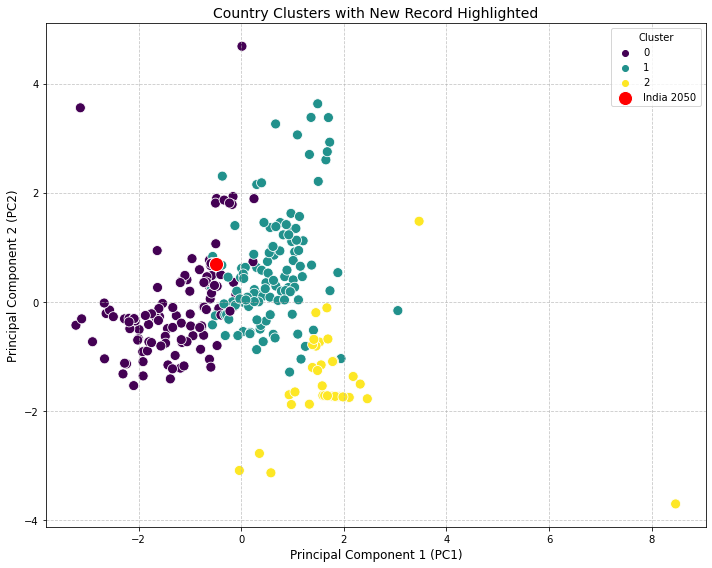

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will use the df_cluster_pca DataFrame which already contains the PCA components and cluster assignments
# Add the new data point's PCA components to this DataFrame for plotting
new_data_pca_df = pd.DataFrame(new_data_pca, columns=['PC1', 'PC2'])
new_data_pca_df['Cluster'] = new_data_cluster

# Combine the original PCA DataFrame with the new data point
combined_df = pd.concat([df_cluster_pca, new_data_pca_df], ignore_index=True)

# Plot the clusters and the new data point
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=combined_df, palette='viridis', edgecolor='w', s=100)

# Highlight the new data point
plt.scatter(new_data_pca_df['PC1'], new_data_pca_df['PC2'], s=200, color='red', edgecolor='w', label='India 2050')

# Set plot labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('Country Clusters with New Record Highlighted', fontsize=14)

# Add legend
plt.legend(title='Cluster', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

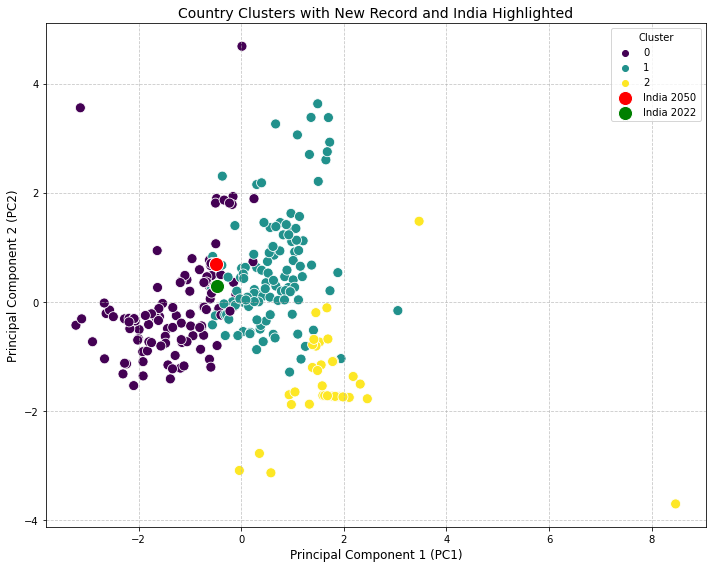

In [12]:
# To highlight the old India record, we need to find India's index in the original dataframe and then highlight it on the PCA plot.

# Find the index of India in the original dataframe
india_index = df[df['Country Name'] == 'India'].index

# If India is in the dataframe, we highlight it
if not india_index.empty:
    india_index = india_index[0]  # Get the actual index value if India is found

    # Plot the clusters and the new data point with India highlighted
    plt.figure(figsize=(10, 8))
    
    # Scatter plot for clusters
    scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_cluster_pca, palette='viridis', edgecolor='w', s=100)
    
    # Highlight the new data point
    plt.scatter(new_data_pca_df['PC1'], new_data_pca_df['PC2'], s=200, color='red', edgecolor='w', label='India 2050')
    
    # Highlight the old India record
    plt.scatter(df_cluster_pca.loc[india_index, 'PC1'], df_cluster_pca.loc[india_index, 'PC2'], s=200, color='green', edgecolor='w', label='India 2022')

    # Set plot labels and title
    plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
    plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
    plt.title('Country Clusters with New Record and India Highlighted', fontsize=14)

    # Add legend
    plt.legend(title='Cluster', fontsize=10)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("India record not found in the dataset.")
